In [1]:
%load_ext autoreload
%autoreload 2
import sys
if ".." not in sys.path:
    sys.path.append("..")

import numpy as np
import matplotlib.pyplot as plt
import signature.tensor_algebra as ta

import iisignature

In [9]:
from signature.numba_utility import combinations
import itertools

In [4]:
p = 6
q = 6

In [16]:
%%timeit
combinations(np.arange(p + q), r=p)

15.9 µs ± 1.89 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [15]:
%%timeit
np.fromiter(itertools.combinations(iterable=np.arange(p+q), r=p), dtype=np.dtype((int, p)))

534 µs ± 70.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [12]:
%%timeit
np.vstack([*itertools.combinations(iterable=np.arange(p+q), r=p)])

2 ms ± 108 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [2]:
%%time
dim = 2
trunc = 4
shuffle_table = ta.get_shuffle_table(table_trunc=trunc, dim=dim)

CPU times: total: 5.69 s
Wall time: 9.33 s


In [3]:
ts1 = ta.from_dict(word_dict={0: 1, 2: 2, 22: 0.5, 12: 3, 112: 4, 2212: 5}, trunc=4, dim=dim)
ts2 = ta.from_dict(word_dict={0: 2, 22: 1.5, 11: 3}, trunc=4, dim=dim)

In [4]:
print(ts1)
print(ts2)
print(ts1 + ts2)
print(ts2 + 2 * ts1)
print(ts1 @ ts2)
print(ts1.proj(2))
print(ta.tensor_prod_word(ts1, 12))

1.0*0 + 2.0*2 + 3.0*12 + 0.5*22 + 4.0*112 + 5.0*2212
2.0*0 + 3.0*11 + 1.5*22
3.0*0 + 2.0*2 + 3.0*11 + 3.0*12 + 2.0*22 + 4.0*112 + 5.0*2212
4.0*0 + 4.0*2 + 3.0*11 + 6.0*12 + 2.5*22 + 8.0*112 + 10.0*2212
2.75
2.0*0 + 3.0*1 + 0.5*2 + 4.0*11 + 5.0*221
1.0*12 + 2.0*212 + 3.0*1212 + 0.5*2212


In [5]:
ts1 = ta.from_dict(word_dict={12: 1, 22: 2}, trunc=5, dim=dim)
ts2 = ta.from_dict(word_dict={21: 1, 2: 1, 1: 5}, trunc=5, dim=dim)

print(ta.tensor_prod(ts1, ts2))

5.0*121 + 1.0*122 + 10.0*221 + 2.0*222 + 1.0*1221 + 2.0*2221


In [6]:
ts = ta.from_dict({22: 1}, trunc=10, dim=dim)
print(ta.tensor_exp(ts, 12))

1.0*0 + 1.0*22 + 0.5000000000000007*2222 + 0.16666666666666657*222222 + 0.041666666666666644*22222222 + 0.008333333333333328*2222222222


In [7]:
ts3 = ta.from_dict({1: 2, 12: 3}, trunc=6, dim=dim)
ts4 = ta.from_dict({0: 2, 2: 1, 22: 3}, trunc=6, dim=dim)
print(ts3)
print(ts4)
print(ta.tensor_prod(ts3, ts4))

2.0*1 + 3.0*12
2.0*0 + 1.0*2 + 3.0*22
4.0*1 + 8.0*12 + 9.0*122 + 9.0*1222


In [8]:
table_4d = ta.get_shuffle_table(table_trunc=4, dim=4)
print(
    ta.shuffle_prod(
        ta.from_dict(word_dict={1: 2, 31: 2}, trunc=4, dim=4),
        ta.from_dict(word_dict={21: 3}, trunc=4, dim=4),
        table_4d
    )
)

6.0*121 + 12.0*211 + 6.0*2131 + 12.0*2311 + 6.0*3121 + 12.0*3211


### Time dependent coefs

In [9]:
ts_timedep = ta.from_dict(word_dict={0: np.arange(5), 2: 2 * np.arange(5)}, trunc=5, dim=dim)
print(ts_timedep)

print(ts_timedep.proj(2))

[0. 1. 2. 3. 4.]*0 + [0. 2. 4. 6. 8.]*2
[0. 2. 4. 6. 8.]*0


In [13]:
print(ta.shuffle_prod_2d(ts_timedep, ts_timedep, shuffle_table))

[ 0.  1.  4.  9. 16.]*0 + [ 0.  4. 16. 36. 64.]*2 + [  0.   8.  32.  72. 128.]*22


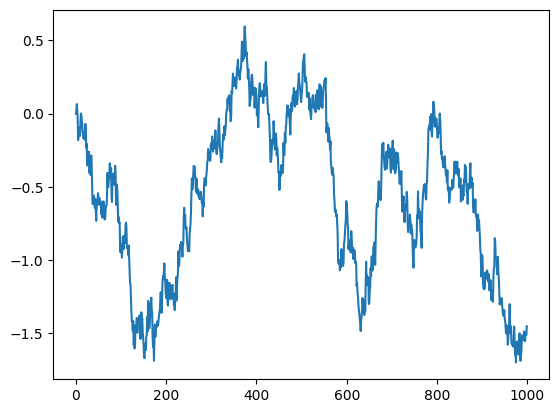

In [14]:
T = 5
t_grid = np.linspace(0, T, 1000)
rng = np.random.default_rng(seed=43)
W = np.concatenate([[0], np.cumsum(rng.normal(size=len(t_grid) - 1) * np.sqrt(np.diff(t_grid)))])
plt.plot(W)

path = np.vstack([t_grid, W]).T

In [16]:
N = 10
W_sig = ta.path_to_signature(path=path, trunc=10)
# W_sig

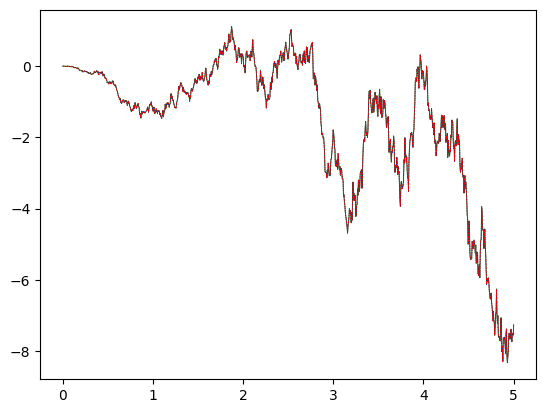

In [17]:
e = ta.AlgebraBasis(trunc=N, dim=dim)

plt.plot(t_grid, np.real(W_sig @ ta.shuffle_prod(e[2], e[1], shuffle_table)), "g", lw=0.7)
plt.plot(t_grid, np.real(W_sig @ (e[12] + e[21])), "b:", lw=0.6)
# plt.plot(t_grid, np.cumsum(W * np.diff(t_grid)[0]), 'r--')
plt.plot(t_grid, W * t_grid, 'r--', lw=0.5)

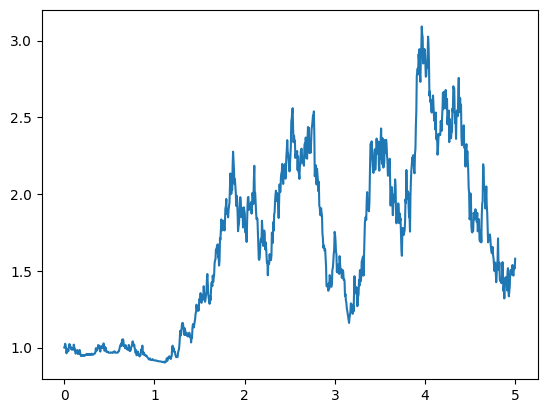

In [18]:
l = ta.from_dict(word_dict={0: 1, 1: 0.4, 2: 0.3, 11: 0.1, 12: 0.3, 21: 0.5, 22: 0.5}, trunc=N, dim=dim)
plt.plot(t_grid, np.real(W_sig @ l))